In [2]:
import glob
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import yaml

from copy import deepcopy
import torch
import torch.distributed as dist
import torch.nn as nn

import cv2
import matplotlib.pyplot as plt

from utils.dataloaders import create_dataloader
from utils.plots import plot_images

c:\Users\andre\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [56]:
train_path = '../new_data_processed_1/test/images'
imgsz = 512
batch_size = 16
WORLD_SIZE = 1
gs = 0  # grid size (max stride
hyp_folder = 'data/hyps/hyp.CUSTOM.yaml'
if isinstance(hyp_folder, str):
    with open(hyp_folder, errors='ignore') as f:
        hyp = yaml.safe_load(f)  # load hyps dict

single_cls = False
rank = -1
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
image_weights = False
seed = 0
quad = False
prefix = ''


In [57]:
train_loader, dataset = create_dataloader(train_path,
                                              imgsz,
                                              batch_size // WORLD_SIZE,
                                              gs,
                                              single_cls,
                                              hyp=hyp,
                                              augment=True,
                                              cache=None, #if opt.cache == 'val' else opt.cache,
                                              rect= False, #opt.rect,
                                              rank=rank,
                                              workers=4,
                                              image_weights=image_weights,
                                              quad=quad,
                                              prefix=prefix,
                                              shuffle=True,
                                              seed=seed,
                                              training = True, 
                                              weighted_sampler=False,)

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
Scanning ..\new_data_processed_1\test\labels.cache... 147 images, 0 backgrounds, 0 corrupt: 100%|██████████| 147/147 [00:00<?, ?it/s]
WARNING  ..\new_data_processed_1\test\images\P14_HE_Default_Extended_3_2_12.tif: 2 duplicate labels removed
WARNING  ..\new_data_processed_1\test\images\P14_HE_Default_Extended_3_2_13.tif: 1 duplicate labels removed
WARNING  ..\new_data_processed_1\test\images\P14_HE_Default_Extended_3_2_17.tif: 1 duplicate labels removed
WARNING  ..\new_data_processed_1\test\images\P14_HE_Default_Extended_3_2_18.tif: 1 duplicate labels removed
WARNING  ..\new_data_processed_1\test\images\P14_HE_Default_Extended_3_2_2.tif: 2 duplicate labels removed
WARNING  ..\new_data_processed_1\test\images\P14_HE_Default_Extended_3_2_5.tif: 2 duplicate labels removed


In [ ]:
dest_path = 'augmented_images'
for i, (imgs, targets, paths, _) in enumerate(train_loader):

    plot_images(imgs, targets, paths, fname= os.path.join(dest_path,f'augmented_batch_{i}.png'))
    plot_images(imgs, [], paths, fname= os.path.join(dest_path,f'augmented_batch_nolabel_{i}.png'))
    if i == 5:
        break
    

ok


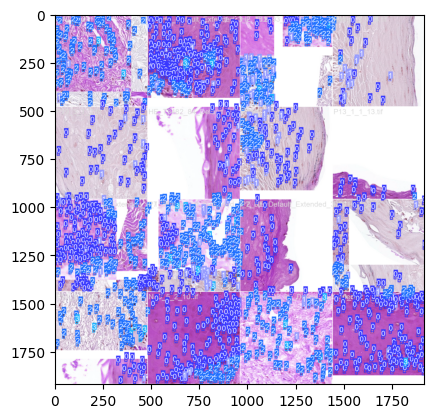

ok


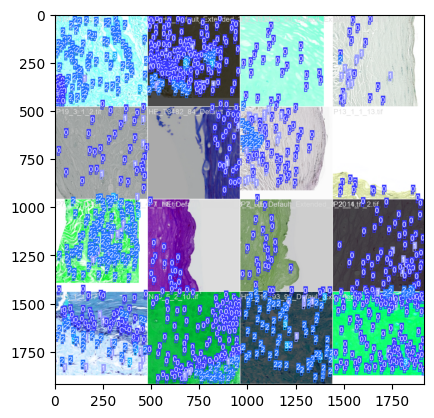

ok


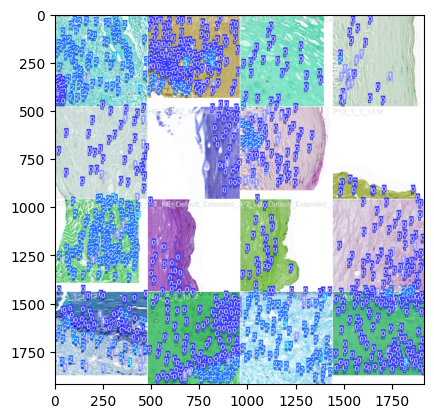

ok


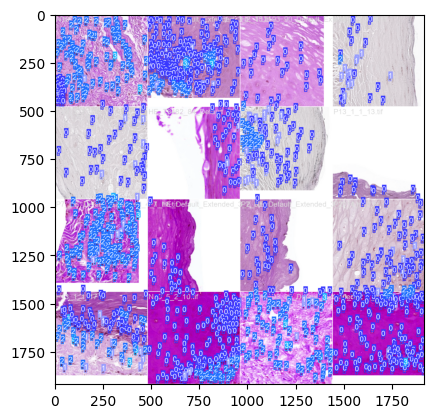

ok


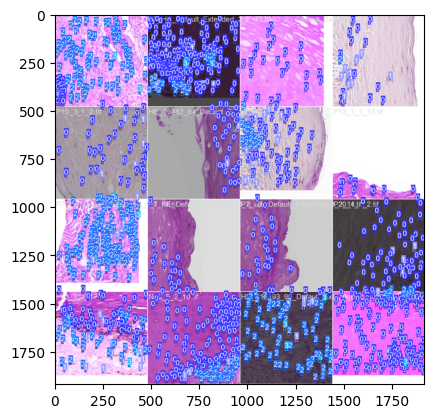

ok


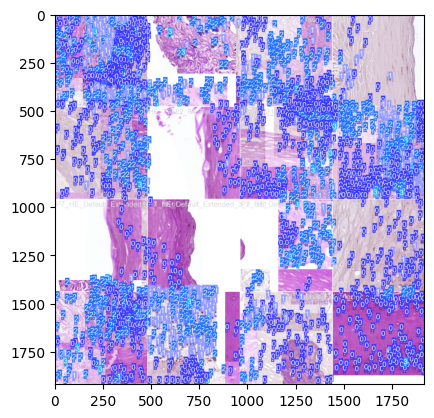

ok


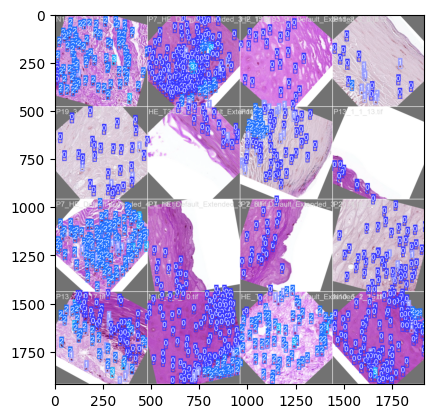

ok


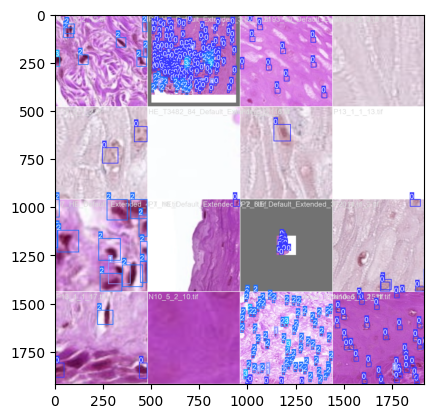

ok


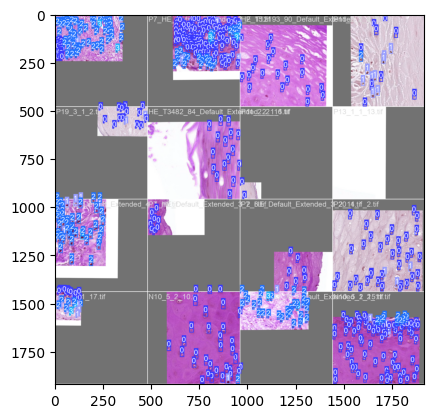

ok


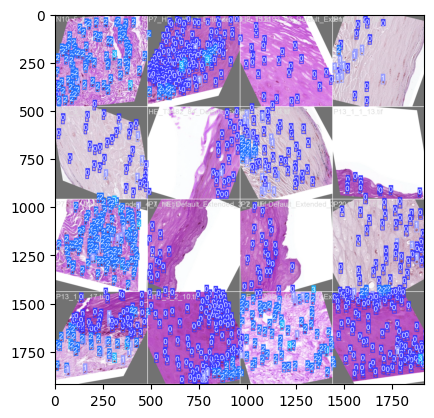

In [1]:
def visualize_augmented_images(dir_path):
    files = glob.glob(os.path.join(dir_path,'*'))
    for f in files:
        if os.path.isdir(f):
            visualize_augmented_images(f)
        else:
            #print('ok')
            img = cv2.imread(f)
            plt.imshow(img)
            plt.show()
            break

visualize_augmented_images('../DataLoader/AUG')

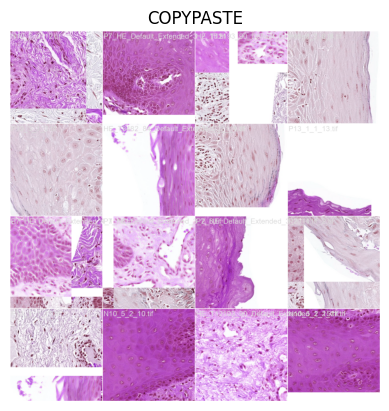

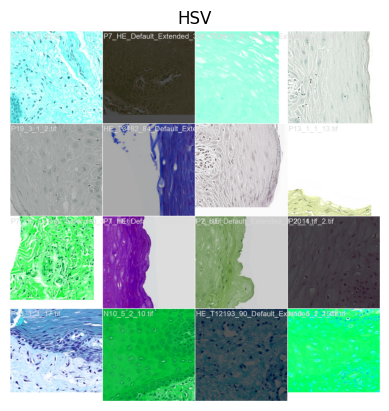

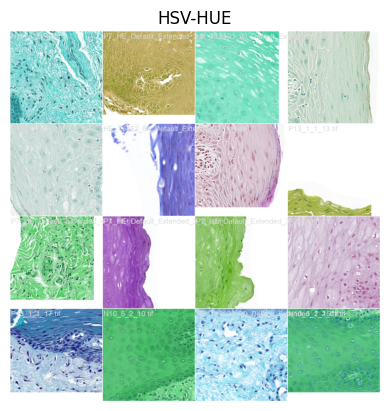

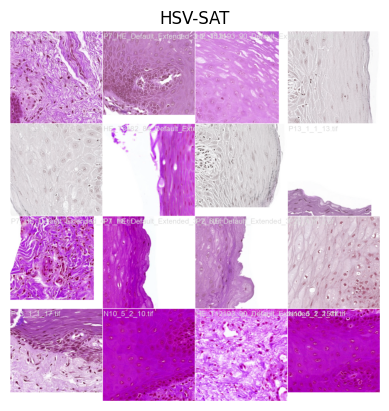

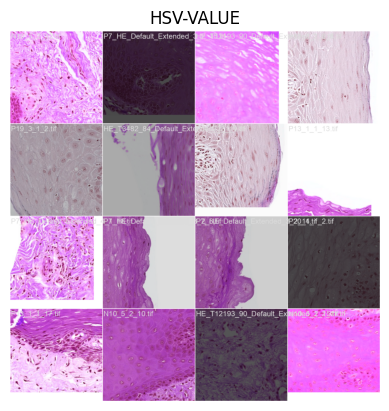

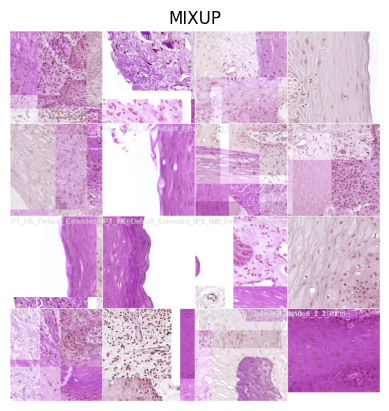

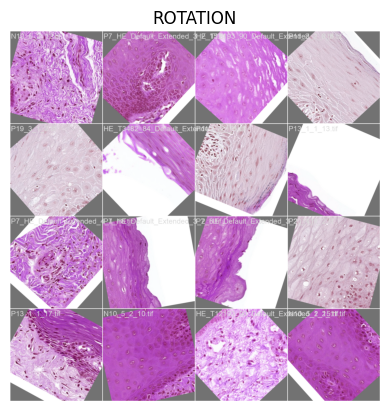

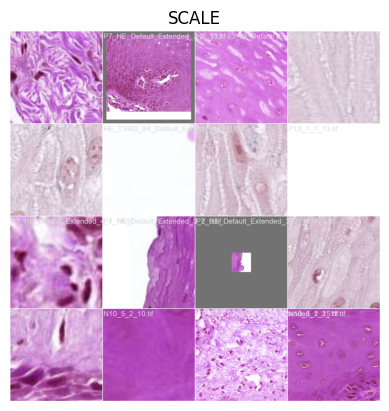

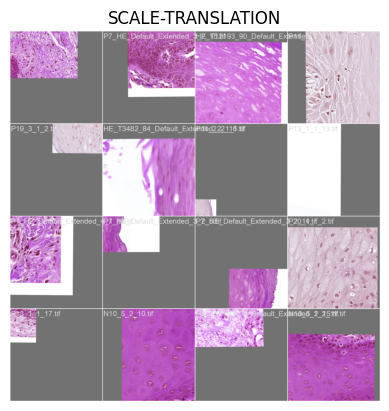

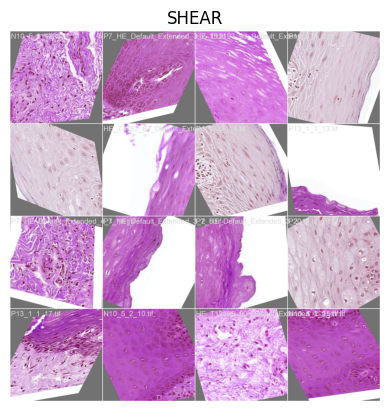

In [5]:
def visualize_augmented_images_no_label(dir_path):
    files = glob.glob(os.path.join(dir_path,'*'))
    for f in files:
        if os.path.isdir(f):
            visualize_augmented_images_no_label(f)
        else:
            if 'augmented_batch_nolabel' in f:
                img = cv2.imread(f)
                plt.imshow(img)
                # Do not show x,y axis
                plt.axis('off')
                # Remove the white frame
                plt.gca().xaxis.set_major_locator(plt.NullLocator())
                plt.gca().yaxis.set_major_locator(plt.NullLocator())
                # Title = Directory name
                plt.title(f.split('\\')[-2])
                plt.show()
                break

visualize_augmented_images_no_label('../DataLoader/AUG')